In [12]:
import numpy as np
from numpy import ndarray
import seaborn as sns
from typing import List

In [4]:
class Layer(object):
    
    def __init__(self):
        pass
    
    def forward(self, input_: ndarray) -> ndarray:
        return self._output(input_)
    
    def backward(self, back_grad: ndarray) -> ndarray:
        raise NotImplementedError

In [5]:
class ParamLayer(Layer):
    
    def __init__(self, num_neurons: int):
        self.neurons = num_neurons
        self.first = True
        
    def forward(self, input_: ndarray) -> ndarray:
        if self.first:
            self._init_params(input_.shape[1])
            self.first = False
        self.input_ = input_
        return self._output(self.input_)
        
    def backward(self, back_grad: ndarray) -> ndarray:
        input_derive = self._input_derivation(back_grad)
        self._param_derivation(back_grad)
        return input_derive
    
    def _init_params(self, input_size: int):
        raise NotImplementedError()
        
    def _output(self, input_: ndarray) -> ndarray:
        raise NotImplementedError()
        
    def _param_derivation(self, back_grad: ndarray):
        raise NotImplementedError()
        
    def _input_derivation(self, back_grad: ndarray) -> ndarray:
        raise NotImplementedError()

In [6]:
class Linear(ParamLayer):
    
    def __init__(self, num_neurons: int):
        super().__init__(num_neurons)
        
    def _init_params(self, input_size: int):
        self.params = []
        weights = np.random.normal(loc = 0.0, scale = 1.0, size = (input_size, self.neurons))
        biases  = np.random.normal(loc = 0.0, scale = 1.0, size = (1, self.neurons))
        
        self.params.append(weights)
        self.params.append(biases)

    def _output(self, input_: ndarray) -> ndarray:
        return np.dot(self.input_, self.params[0]) + self.params[1]
        
    def _param_derivation(self, back_grad: ndarray):
        self.param_derivates = []
        self.param_derivates.append(np.dot(self.input_.T, back_grad))
        self.param_derivates.append(np.reshape(np.sum(back_grad, axis=0), (1, self.neurons)))
        
    def _input_derivation(self, back_grad: ndarray) -> ndarray:
        return np.dot(back_grad, self.params[0].T)

In [7]:
x = np.linspace(0, 1.0, 100)
y = 1.0*x + np.sin(x * 10.0) * 0.15 + np.random.normal(size=(x.shape[0],)) * 0.06

x_batch = x.reshape(5, -1)
y_target = x.reshape(5, -1)

linear_layer = Linear(20)

for epoch in range(200):
#     for i, batch in enumerate(x_batch):
        
    y_pred = linear_layer.forward(x_batch)

    error_grad = (y_pred - y_target)/y_target.shape[0]

    grad = linear_layer.backward(error_grad)

    linear_layer.params[0] -= linear_layer.param_derivates[0] * 0.01
    linear_layer.params[1] -= linear_layer.param_derivates[1] * 0.01
        
    if (epoch + 1) % 20 == 0:
        y_pred = linear_layer.forward(x_batch)
        error = np.mean(np.sum((y_pred - y_target)**2, axis=1))
        print(error)


12.435357988803329
5.836147494144956
5.068962088081717
4.605471029433776
4.193902605923826
3.8195431674058127
3.4786193503170275
3.16812648879966
2.885347482163471
2.6278086205735582


In [8]:
y_pred = linear_layer.forward(x.reshape(5, 20))
y_pred_group = y_pred.reshape(100)

/home/ivan/miniconda3/envs/env1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ivan/miniconda3/envs/env1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

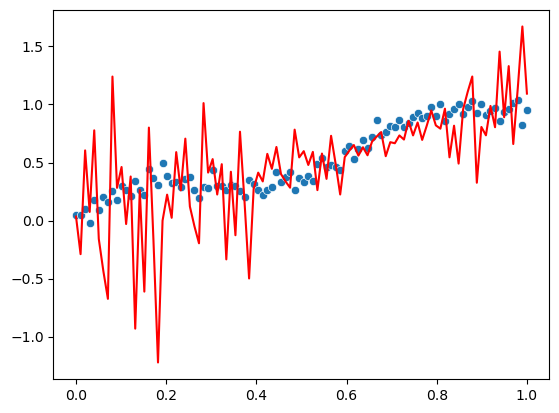

In [9]:
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=y_pred_group, color='red')

In [10]:
class Sigmoid(Layer):
    
    def __init__(self):
        pass
    
    def _output(self, input_):
        self.output = 1/(1+np.exp(-input_))
        return self.output
    
    def backward(self, backprop_grad: ndarray) -> ndarray:
        return self.outptut * (1.0 - self.output) * backprop_grad

In [13]:
class Model(object):
    
    def __init__(self, layers: List[Layer]):
        self.layers = layers
        
    def forward(self, input_: ndarray) -> ndarray:
        output = input_
        for layer in self.layers:
            output = layer.forward(output)
        return output
    
    def backward(self, error_grad: ndarray):
        back_error = error_grad
        for layer in reversed(self.layers):
            back_error = layer.backward(back_error)
            
    def _params(self):
        for layer in self.layers:
            if isinstance(layer, ParamLayer):
                for param in layer.params:
                    yield param
                    
    def _param_grads(self):
        for layer in self.layers:
            if isinstance(layer, ParamLayer):
                 for param_derivate in layer.param_derivates:
                        yield param_derivate